# EDA SET 1 FOR DIABETES 

Importing the librarys

In [1]:
import pandas as pd
import os
import numpy as np


### to read the file and store into the data frame

In [2]:
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### to check the information about dataset,what are the columns are avilable and data types

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### to check the data size how many columns and rows are avilable


In [4]:
dataset.shape

(768, 9)

### to check the if any null values are there or not

In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### so there is null values in the data set

### To check if any duplicates are there or not

In [6]:
dataset.duplicated().sum()

0

### so there is no duplicate in the data set ,now we can check the stastistical information

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### the mean value of Glucose, Blood Pressure,SkinThickness,Insulin and BMI of some rows have  0's so in real time that's not possible  so checking the  how many rows there


In [8]:
len(dataset.loc[(dataset['Glucose']==0)|(dataset['BloodPressure']==0)|(dataset['SkinThickness']==0)|(dataset['BMI']==0)])

236

### 236 means approximatly 30% of data ,we cann't delete thats row. now we can check individulaly for which group has many rows

In [10]:
len(dataset.loc[(dataset['BloodPressure']==0)])

35

In [11]:
len(dataset.loc[(dataset['Glucose']==0)])

5

In [12]:
len(dataset.loc[(dataset['SkinThickness']==0)])

227

In [13]:
len(dataset.loc[(dataset['BMI']==0)])

11

### so Glucose, Blood Pressure and BMI total 0's rows are approxmaitly 2.5% so i can drop those and skinThickness is replaced by mean 

In [14]:
dataset=dataset[(dataset[['Glucose','BloodPressure','BMI','Insulin']]!=0).all(axis=1)]

In [15]:
dataset["SkinThickness"] = dataset.SkinThickness.fillna(dataset['SkinThickness'].mean())

In [16]:
dataset.loc[(dataset['Glucose']==0)|(dataset['BloodPressure']==0)|(dataset['SkinThickness']==0)|(dataset['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### now the data is  cleaned we can check statistical information 

In [17]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insulin has more outliears because min value is 14 max is 846.now we can draw box plot for data to check outliears

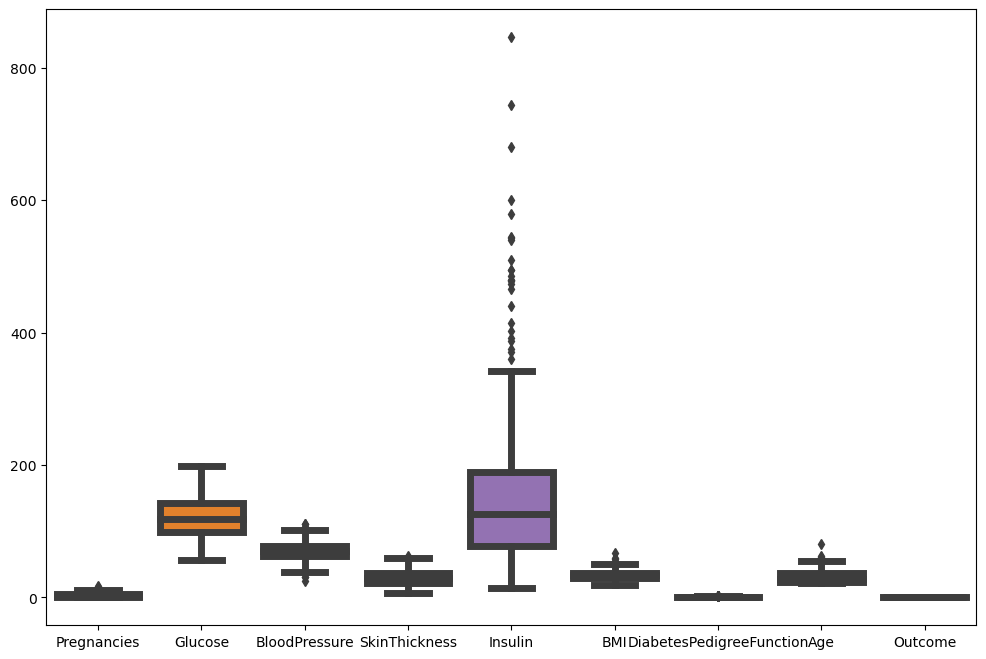

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=dataset,width=0.8,fliersize=5,linewidth=5,whis=1.5)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

### Insulin has more outliears and age has less outliears. to solve them by using IQRs

In [18]:
q1 = dataset['Insulin'].quantile(0.25)                 
q3 = dataset['Insulin'].quantile(0.75)
iqr = q3 - q1


In [19]:
filter = (dataset['Insulin'] >= q1 - iqr*1.5) & (dataset['Insulin'] <= q3 + 1.5*iqr)
dataset.loc[filter] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


<AxesSubplot:xlabel='Age'>

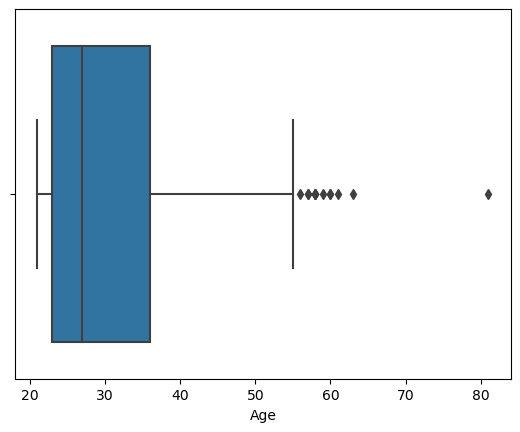

In [26]:
sns.boxplot(x=dataset['Age'])

<AxesSubplot:xlabel='Pregnancies'>

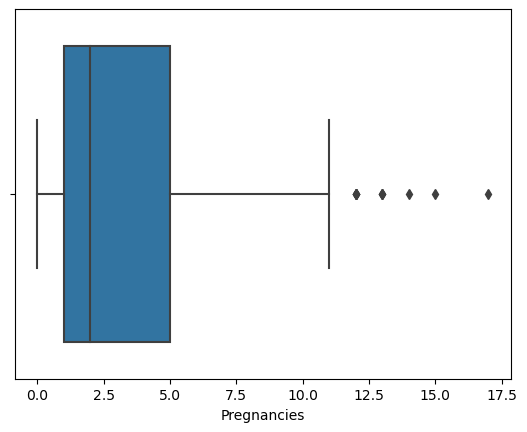

In [27]:
sns.boxplot(x=dataset['Pregnancies'])

<AxesSubplot:xlabel='Insulin'>

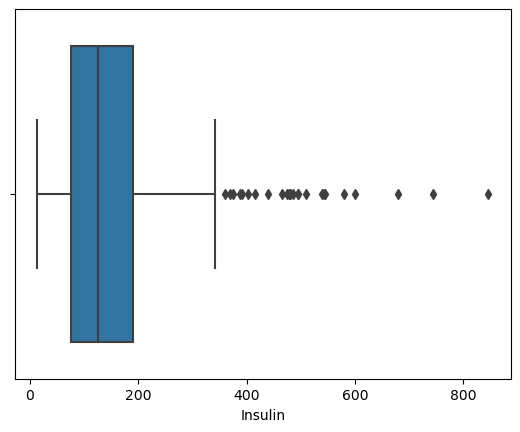

In [28]:
sns.boxplot(x=dataset['Insulin'])

### we can check the correlation between the featurs 

<AxesSubplot:>

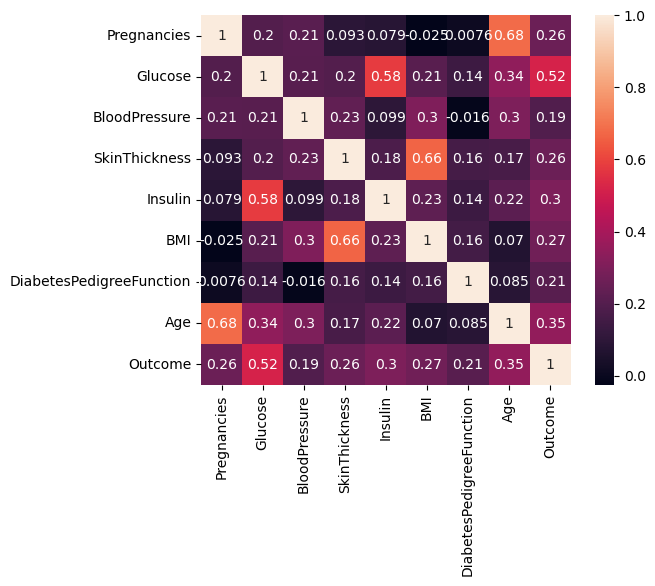

In [22]:
sns.heatmap(data=dataset.corr(), square=True , annot=True, cbar=True)

### so Age --Pregnancies has more relation and 
### glucose-Insulin
### BMI-skinThickness has more relation so these features are importent for data set

### we can count the how many of them has dieabetic

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

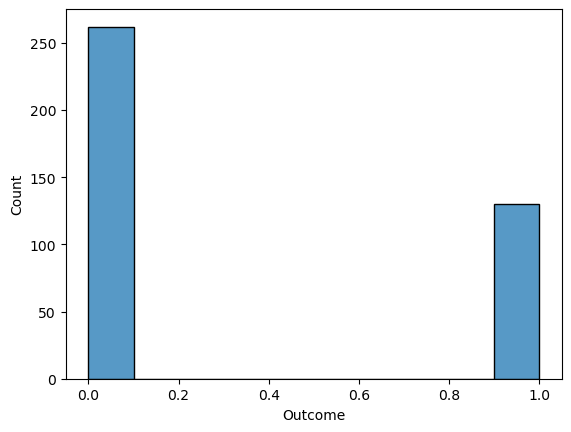

In [30]:
sns.histplot(dataset['Outcome']) 

### we can check the relation between pregnancies and age 

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

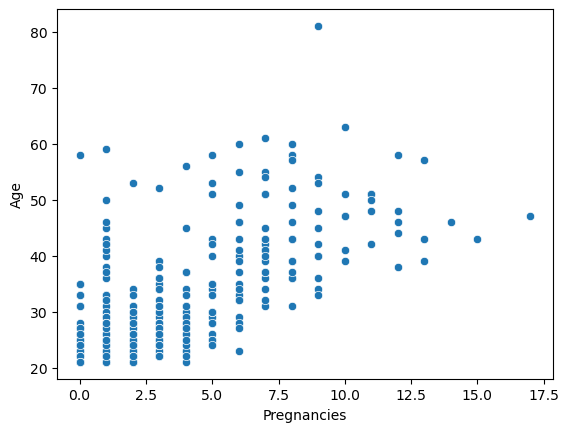

In [23]:
sns.scatterplot(x=dataset['Pregnancies'],y=dataset['Age'])

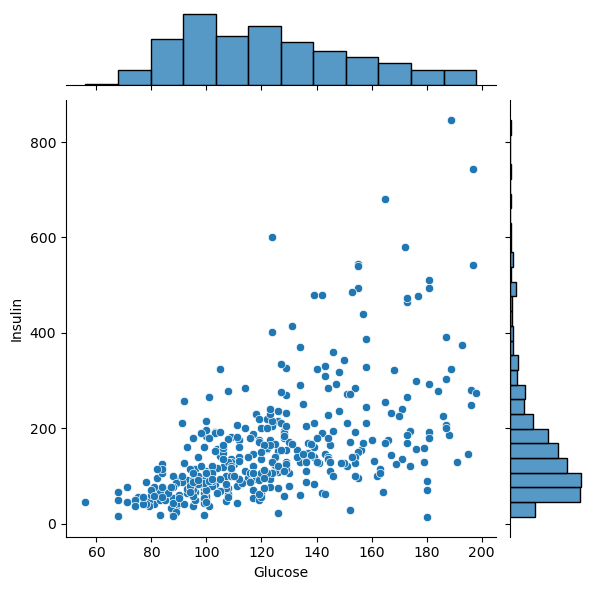

In [32]:
sns.jointplot(data =dataset,x="Glucose",y = "Insulin")

[[1.         0.66435487]
 [0.66435487 1.        ]]


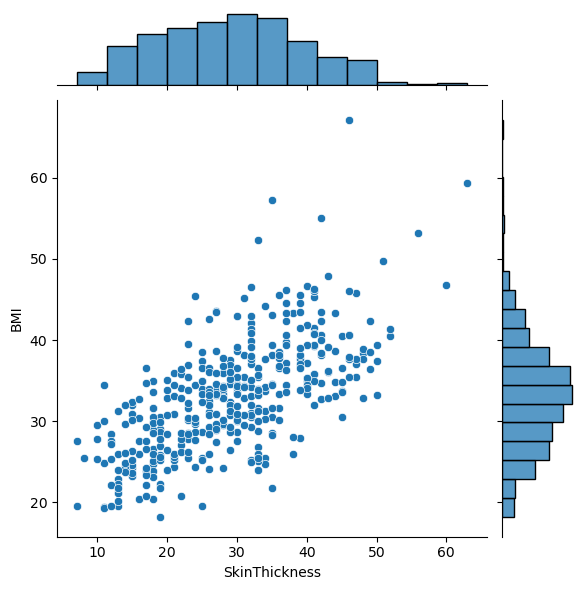

In [33]:
sns.jointplot(data =dataset,x="SkinThickness",y = "BMI")
print(np.corrcoef(dataset['SkinThickness'],dataset['BMI']))

[[1.         0.00756212]
 [0.00756212 1.        ]]


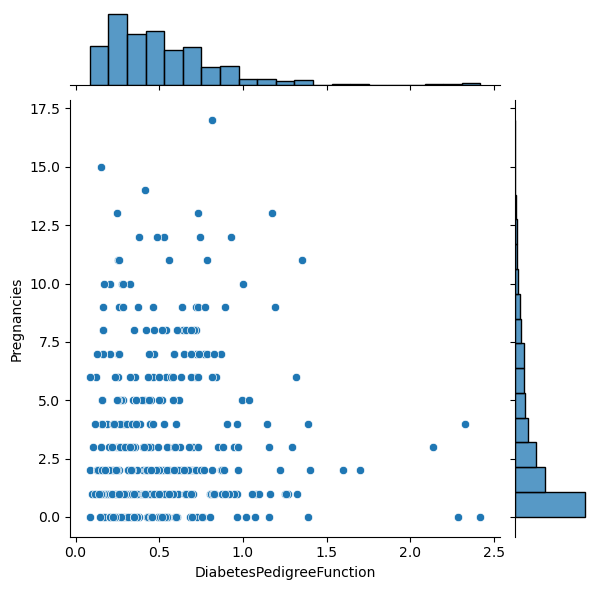

In [34]:
sns.jointplot(data =dataset,x="DiabetesPedigreeFunction",y = "Pregnancies")
print(np.corrcoef(dataset['DiabetesPedigreeFunction'],dataset['Pregnancies']))

## Thank You